In [1]:
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

%matplotlib inline

In [2]:
ship = pd.read_csv('../data/fuel_consumption_by_ship_size_prepped.csv')
#source: The Geography of Transport Systems- https://transportgeography.org/contents/chapter4/transportation-and-energy/fuel-consumption-containerships/
#converted to data with:  http://getdata-graph-digitizer.com/

truck = pd.read_csv('../data/mpg_trucks_prepped.csv')
#source: US Energy Information Administration - https://www.eia.gov/totalenergy/data/browser/?tbl=T01.08



In [3]:
#setting the size of my visuals:
sns.set(rc={"figure.figsize":(13, 8)},font_scale=1.5, style='darkgrid')

# SHIPS - TON MPG

In [4]:
#cleaning and calculations work for df done in excel

ship.head()

,Ship Size (TEU),TEU avg,TEU to weight lbs,TEU to weight - tons,Speed- Knots,Fuel Consumption - Tons per Day,Speed-MPH,Ton miles per hour,Fuel Consumption - Gallons per day,Fuel Consumption- Gallons/hour,MPG,Gallons per mile,Ton MPG,Ton MPG cleaner
0,"10,000+",10000.0,529100000.0,264550.0,17.48,103.56,20.102576,13160.00495,77468.63057,3227.859607,0.006228,160.569452,1647.573749,1647.57
1,"10,000+",10000.0,529100000.0,264550.0,17.55,105.62,20.185889,13105.68954,79011.10832,3292.129514,0.006132,163.090634,1622.104198,1622.10
2,"10,000+",10000.0,529100000.0,264550.0,17.66,108.71,20.304878,13028.88871,81322.85500,3388.452292,0.005992,166.878729,1585.282806,1585.28
3,"10,000+",10000.0,529100000.0,264550.0,17.74,109.77,20.400366,12967.90446,82111.82351,3421.325979,0.005963,167.709047,1577.434401,1577.43
4,"10,000+",10000.0,529100000.0,264550.0,17.79,110.81,20.459967,12930.12860,82888.97226,3453.707177,0.005924,168.803168,1567.209808,1567.21


In [5]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Ship Size (TEU)                     429 non-null    object 
 1   TEU avg                             429 non-null    float64
 2   TEU to weight lbs                   429 non-null    float64
 3   TEU to weight - tons                429 non-null    float64
 4   Speed- Knots                        429 non-null    float64
 5   Fuel Consumption - Tons per Day     429 non-null    float64
 6   Speed-MPH                           429 non-null    float64
 7   Ton miles per hour                  429 non-null    float64
 8   Fuel Consumption - Gallons per day  429 non-null    float64
 9   Fuel Consumption- Gallons/hour      429 non-null    float64
 10  MPG                                 429 non-null    float64
 11  Gallons per mile                    429 non-n

In [6]:
#Simplifying my df for easier visualization

ship_graph = ship[['Ship Size (TEU)', 'Speed-MPH', 'Ton MPG cleaner']]

In [7]:
#the 10000+ size is messing everything up.  I cannot accurately guess a weight to determine a probable ton-mile.  
#Dropping and adding a note to my methodology section

ship_graph2 = ship_graph[ship_graph['Ship Size (TEU)'] != '10,000+']
ship_graph2

,Ship Size (TEU),Speed-MPH,Ton MPG cleaner
70,9000-10000x,20.094853,1945.05
71,9000-10000x,20.190129,1906.95
72,9000-10000x,20.309330,1872.63
73,9000-10000x,20.416569,1838.93
74,9000-10000x,20.512056,1826.02
...,...,...,...
424,4000-5000x,28.299514,712.39
425,4000-5000x,28.418715,705.73
426,4000-5000x,28.525953,698.97
427,4000-5000x,28.609267,691.86


Text(0.5, 1.0, 'Average Ton-MPG by Ship Size and Speed')

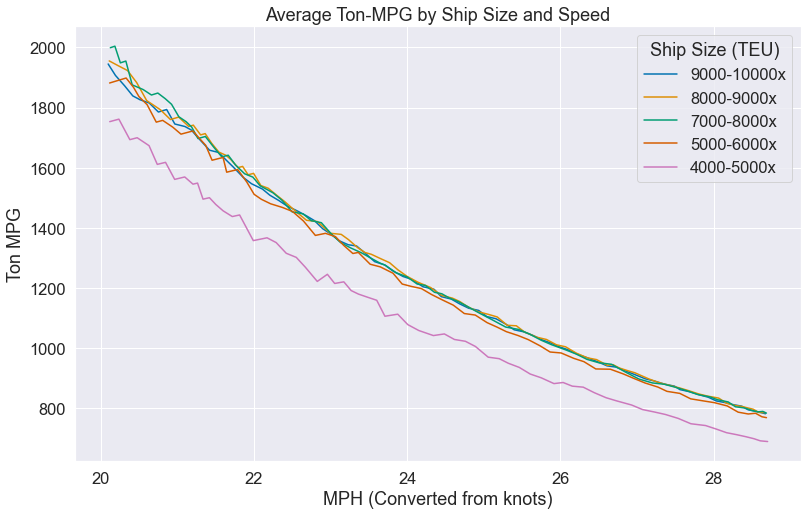

In [8]:
sns.set_palette("colorblind")
a = sns.lineplot(data = ship_graph2, x = 'Speed-MPH', y = 'Ton MPG cleaner', hue = 'Ship Size (TEU)')
a.set(xlabel = 'MPH (Converted from knots)', ylabel = 'Ton MPG')
a.set_title('Average Ton-MPG by Ship Size and Speed')

NOTE:  the research i found supports this trend of mpg going down signifcantly in relation to ship speed.
however, the numbers i see in most reports are significantly lower than the numbers i gained from the data i found

my data is from a good source, and i don't know where the articles get their data from
but i had to (reasonably!) guess at the amount of weight carried by ship and then average it, vs getting accurate cargo weight readings

Data with live tracking of ships, speeds, and cargo types and weights appeared to be available - but behind a paywall
Or free but on a ship-by-ship basis, which exceeds my current abilities and the scope of this project to tabulate: 
https://www.marinetraffic.com/en/ais/home/centerx:-14.4/centery:27.2/zoom:6 

# TRUCKS - TON MPG

In [9]:
truck.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit,Avg weight hauled - lbs,Source/Notes:,Avg weight/tons
0,TRFRRUS,194913,9,9,Heavy-Duty Trucks Fuel Economy,Miles per Gallon,44000,https://www.freightwaves.com/news/how-much-wei...,22
1,TRFRRUS,195013,8.4,9,Heavy-Duty Trucks Fuel Economy,Miles per Gallon,44000,NaN,22
2,TRFRRUS,195113,8.5,9,Heavy-Duty Trucks Fuel Economy,Miles per Gallon,44000,NaN,22
3,TRFRRUS,195213,8.4,9,Heavy-Duty Trucks Fuel Economy,Miles per Gallon,44000,NaN,22
4,TRFRRUS,195313,8.5,9,Heavy-Duty Trucks Fuel Economy,Miles per Gallon,44000,NaN,22


In [10]:
#simplifying df for visualization.  All i want here is the avg MPG for transit trucks

truck_visual = truck[['Description','Avg weight/tons','Value']]

In [11]:
truck_visual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Description      213 non-null    object
 1   Avg weight/tons  213 non-null    int64 
 2   Value            213 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.1+ KB


In [12]:
truck_visual.iloc[71]

Description        Light-Duty Vehicles, Long Wheelbase Fuel Economy
Avg weight/tons                                                  10
Value                                                 Not Available
Name: 71, dtype: object

In [13]:
#got an error when trying to convert data to numeric form.  Found text.  
#deleting rows where data unavailable - not needed for my average-seeking calculation

truck_visual = truck_visual[truck_visual['Value'] != 'Not Available']

In [14]:
#converting to numbers so i can do math

truck_visual['Value'] = pd.to_numeric(truck_visual['Value'])

In [15]:
#finding the avg mpg for each truck by weightclass/avg tons hauled 

truck_visual.groupby('Avg weight/tons').mean()

,Value
Avg weight/tons,
5,18.152113
10,14.905556
22,6.491549


In [16]:
#converting my query to a new df

truck_visual2 = truck_visual.groupby('Avg weight/tons').mean()
truck_visual2.head()

,Value
Avg weight/tons,
5,18.152113
10,14.905556
22,6.491549


In [17]:
truck_visual2.reset_index(drop=False, inplace=True)

In [18]:
truck_visual2.head()

,Avg weight/tons,Value
0,5,18.152113
1,10,14.905556
2,22,6.491549


In [19]:
#calculating the ton-mpg per truck size

truck_visual2['Ton_MPG'] = truck_visual2['Value']*truck_visual2['Avg weight/tons']

In [20]:
truck_visual2.head()

,Avg weight/tons,Value,Ton_MPG
0,5,18.152113,90.760563
1,10,14.905556,149.055556
2,22,6.491549,142.814085


In [21]:
#renaming for visualization clarity

truck_types = ['Light Duty - Short Wheelbase', 'Light Duty - Long Wheelbase', 'Heavy Duty']
truck_visual2['truck_types'] = truck_types

In [22]:
truck_visual2.head()

,Avg weight/tons,Value,Ton_MPG,truck_types
0,5,18.152113,90.760563,Light Duty - Short Wheelbase
1,10,14.905556,149.055556,Light Duty - Long Wheelbase
2,22,6.491549,142.814085,Heavy Duty


In [23]:
#to show the values of the data on my graph:

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

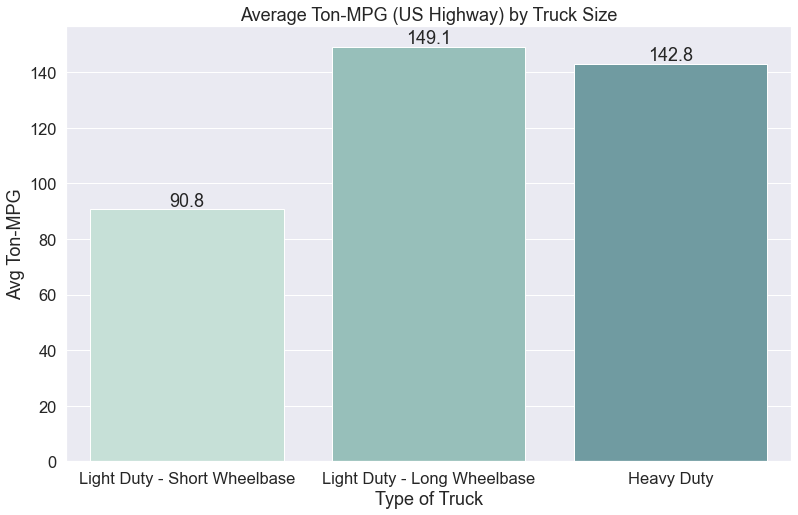

In [24]:
sns.set_palette("ch:start=0, rot=-.3")
b = sns.barplot(data=truck_visual2, x='truck_types', y='Ton_MPG')
b.set(xlabel = 'Type of Truck', ylabel = 'Avg Ton-MPG')
b.set_title('Average Ton-MPG (US Highway) by Truck Size')

show_values(b)

# PLANE-TRAIN TON MPG

In [25]:
#note - i did not find datasets for planes or trains, but i did find quotes of ton miles from reliable sources:
#Plane: https://www.conservationfund.org/images/programs/files/CSX_Final-Curriculum.pdf
#train: https://www.factcheck.org/2008/07/fuel-efficient-freight-trains/

Plane_Train_TonMPG_viz = pd.DataFrame({
    "Type":['Plane','Train'],
    "Avg. Ton MPG": [4.5, 436]
})

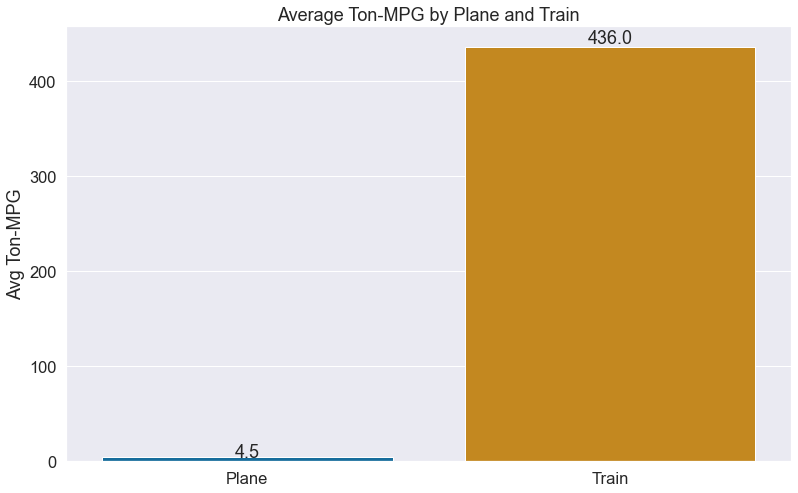

In [26]:
sns.set_palette("colorblind")
c = sns.barplot(data=Plane_Train_TonMPG_viz, x='Type', y='Avg. Ton MPG')
c.set(xlabel = '', ylabel = 'Avg Ton-MPG')
c.set_title('Average Ton-MPG by Plane and Train')

show_values(c)

# Putting it together - 1000 miles


How many gallons of fuel are used to move 1 ton of goods 1000 miles?

# 1000 MILES FUEL - SHIP

In [28]:
ship

,Ship Size (TEU),TEU avg,TEU to weight lbs,TEU to weight - tons,Speed- Knots,Fuel Consumption - Tons per Day,Speed-MPH,Ton miles per hour,Fuel Consumption - Gallons per day,Fuel Consumption- Gallons/hour,MPG,Gallons per mile,Ton MPG,Ton MPG cleaner
0,"10,000+",10000.0,529100000.0,264550.0,17.48,103.56,20.102576,13160.004950,77468.63057,3227.859607,0.006228,160.569452,1647.573749,1647.57
1,"10,000+",10000.0,529100000.0,264550.0,17.55,105.62,20.185889,13105.689540,79011.10832,3292.129514,0.006132,163.090634,1622.104198,1622.10
2,"10,000+",10000.0,529100000.0,264550.0,17.66,108.71,20.304878,13028.888710,81322.85500,3388.452292,0.005992,166.878729,1585.282806,1585.28
3,"10,000+",10000.0,529100000.0,264550.0,17.74,109.77,20.400366,12967.904460,82111.82351,3421.325979,0.005963,167.709047,1577.434401,1577.43
4,"10,000+",10000.0,529100000.0,264550.0,17.79,110.81,20.459967,12930.128600,82888.97226,3453.707177,0.005924,168.803168,1567.209808,1567.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,4000-5000x,4500.0,238095000.0,119047.5,24.61,151.73,28.299514,4206.697690,113499.17740,4729.132391,0.005984,167.110022,712.390002,712.39
425,4000-5000x,4500.0,238095000.0,119047.5,24.71,153.80,28.418715,4189.052907,115053.47490,4793.894787,0.005928,168.687951,705.726199,705.73
426,4000-5000x,4500.0,238095000.0,119047.5,24.81,155.88,28.525953,4173.304886,116603.83250,4858.493020,0.005871,170.318341,698.970491,698.97
427,4000-5000x,4500.0,238095000.0,119047.5,24.88,157.94,28.609267,4161.151750,118146.31020,4922.762926,0.005812,172.068826,691.859784,691.86


In [29]:
ship['1000mi_fuel'] = 1000/ship['Ton MPG cleaner']
ship

,Ship Size (TEU),TEU avg,TEU to weight lbs,TEU to weight - tons,Speed- Knots,Fuel Consumption - Tons per Day,Speed-MPH,Ton miles per hour,Fuel Consumption - Gallons per day,Fuel Consumption- Gallons/hour,MPG,Gallons per mile,Ton MPG,Ton MPG cleaner,1000mi_fuel
0,"10,000+",10000.0,529100000.0,264550.0,17.48,103.56,20.102576,13160.004950,77468.63057,3227.859607,0.006228,160.569452,1647.573749,1647.57,0.606954
1,"10,000+",10000.0,529100000.0,264550.0,17.55,105.62,20.185889,13105.689540,79011.10832,3292.129514,0.006132,163.090634,1622.104198,1622.10,0.616485
2,"10,000+",10000.0,529100000.0,264550.0,17.66,108.71,20.304878,13028.888710,81322.85500,3388.452292,0.005992,166.878729,1585.282806,1585.28,0.630803
3,"10,000+",10000.0,529100000.0,264550.0,17.74,109.77,20.400366,12967.904460,82111.82351,3421.325979,0.005963,167.709047,1577.434401,1577.43,0.633943
4,"10,000+",10000.0,529100000.0,264550.0,17.79,110.81,20.459967,12930.128600,82888.97226,3453.707177,0.005924,168.803168,1567.209808,1567.21,0.638077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,4000-5000x,4500.0,238095000.0,119047.5,24.61,151.73,28.299514,4206.697690,113499.17740,4729.132391,0.005984,167.110022,712.390002,712.39,1.403725
425,4000-5000x,4500.0,238095000.0,119047.5,24.71,153.80,28.418715,4189.052907,115053.47490,4793.894787,0.005928,168.687951,705.726199,705.73,1.416972
426,4000-5000x,4500.0,238095000.0,119047.5,24.81,155.88,28.525953,4173.304886,116603.83250,4858.493020,0.005871,170.318341,698.970491,698.97,1.430677
427,4000-5000x,4500.0,238095000.0,119047.5,24.88,157.94,28.609267,4161.151750,118146.31020,4922.762926,0.005812,172.068826,691.859784,691.86,1.445379


In [30]:
ship1000 = ship[['Ship Size (TEU)', 'Speed-MPH', '1000mi_fuel']]

In [33]:
#I'm only interested in ships that travel at 22mph and 26 mph.  avg slow speed and avg regular speed.  
#rounding numbers to find those more easily

ship1000['Speed-MPH']=ship1000['Speed-MPH'].round()

<ipython-input-33-46fbe32d4529>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ship1000['Speed-MPH']=ship1000['Speed-MPH'].round()


In [32]:
ship1000

,Ship Size (TEU),Speed-MPH,1000mi_fuel
0,"10,000+",20.0,0.606954
1,"10,000+",20.0,0.616485
2,"10,000+",20.0,0.630803
3,"10,000+",20.0,0.633943
4,"10,000+",20.0,0.638077
...,...,...,...
424,4000-5000x,28.0,1.403725
425,4000-5000x,28.0,1.416972
426,4000-5000x,29.0,1.430677
427,4000-5000x,29.0,1.445379


In [34]:
ship1000 = ship1000.loc[ship1000['Speed-MPH'].isin([22.0, 26.0])]

In [36]:
ship1000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 14 to 412
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ship Size (TEU)  100 non-null    object 
 1   Speed-MPH        100 non-null    float64
 2   1000mi_fuel      100 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [37]:
#I want to know the average amount of fuel used to move 1ton 1000 miles - by size and speed of ship

ship1000_result = ship1000.groupby(['Ship Size (TEU)', 'Speed-MPH'])['1000mi_fuel'].mean()
                                                          

In [38]:
ship1000_result

Ship Size (TEU)  Speed-MPH
10,000+          22.0         0.763665
                 26.0         1.184926
4000-5000x       22.0         0.714989
                 26.0         1.133210
5000-6000x       22.0         0.646088
                 26.0         1.021415
7000-8000x       22.0         0.642125
                 26.0         1.004623
8000-9000x       22.0         0.634577
                 26.0         0.995028
9000-10000x      22.0         0.643977
                 26.0         0.996243
Name: 1000mi_fuel, dtype: float64

In [39]:
#that's not a df ... what is that?  I need to convert it to a df to be plottable

type(ship1000_result)

pandas.core.series.Series

In [40]:
ship1000_result = pd.DataFrame(ship1000_result).reset_index()

In [41]:
ship1000_result

,Ship Size (TEU),Speed-MPH,1000mi_fuel
0,"10,000+",22.0,0.763665
1,"10,000+",26.0,1.184926
2,4000-5000x,22.0,0.714989
3,4000-5000x,26.0,1.133210
4,5000-6000x,22.0,0.646088
5,5000-6000x,26.0,1.021415
6,7000-8000x,22.0,0.642125
7,7000-8000x,26.0,1.004623
8,8000-9000x,22.0,0.634577
9,8000-9000x,26.0,0.995028


In [42]:
#Deleting the 10000+ metric because the data is flawed

ship1000_result = ship1000_result[ship1000_result['Ship Size (TEU)'] != '10,000+']

In [43]:
ship1000_result = ship1000_result.sort_values(by = 'Ship Size (TEU)').reset_index()

Text(0.5, 1.0, 'Average Gallons of Fuel Consumed in 1000 Miles (per ton of cargo)')

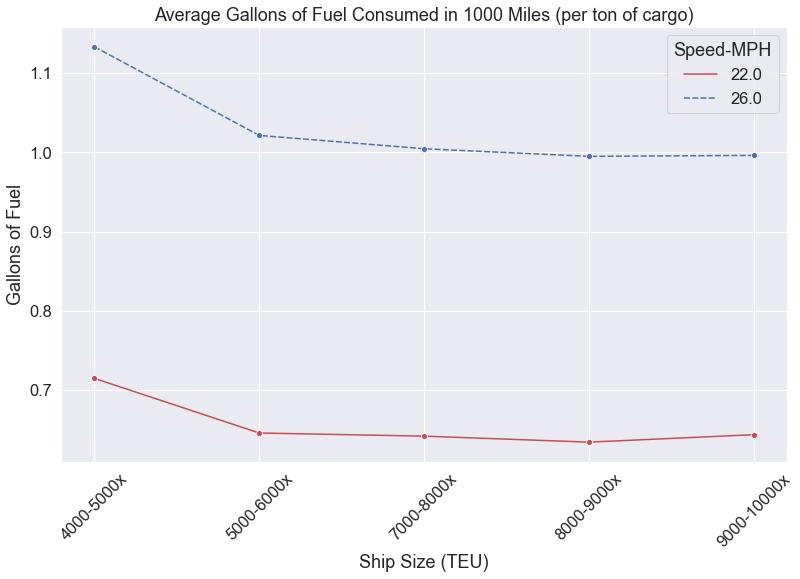

In [87]:
fig, ax = plt.subplots(figsize=(13,8))

d = sns.lineplot(data = ship1000_result, x = 'Ship Size (TEU)', y = '1000mi_fuel', hue = 'Speed-MPH',
                style = "Speed-MPH", marker="o", palette = ['r','b'])
plt.xticks(rotation=45)
d.set(xlabel = 'Ship Size (TEU)', ylabel = 'Gallons of Fuel')
d.set_title('Average Gallons of Fuel Consumed in 1000 Miles (per ton of cargo)')

# 1000 MILES FUEL - TRUCK

In [48]:
#gallons of fuel used per ton of cargo for trucks per 1000 miles

truck_visual2

,Avg weight/tons,Value,Ton_MPG,truck_types
0,5,18.152113,90.760563,Light Duty - Short Wheelbase
1,10,14.905556,149.055556,Light Duty - Long Wheelbase
2,22,6.491549,142.814085,Heavy Duty


In [49]:
truck_visual2 = truck_visual2.rename(columns={'Value':'MPG'})

In [50]:
truck_visual2['1000mi']= 1000/truck_visual2['Ton_MPG']
truck_visual2

,Avg weight/tons,MPG,Ton_MPG,truck_types,1000mi
0,5,18.152113,90.760563,Light Duty - Short Wheelbase,11.018001
1,10,14.905556,149.055556,Light Duty - Long Wheelbase,6.708908
2,22,6.491549,142.814085,Heavy Duty,7.002110


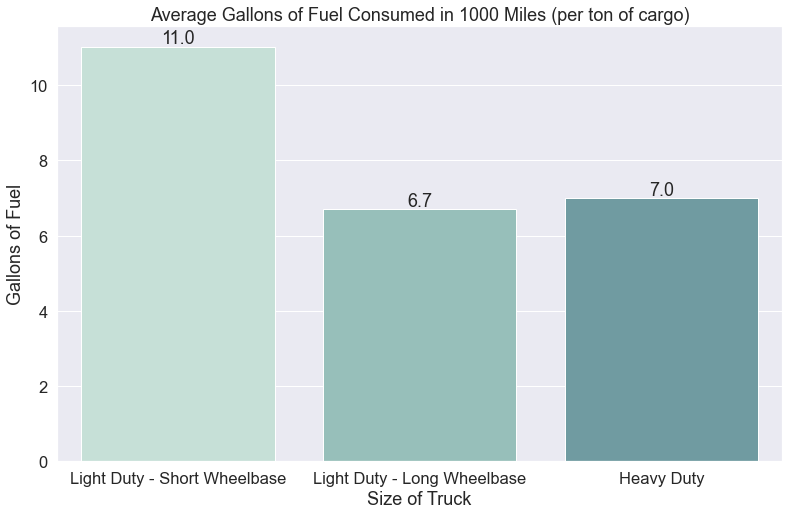

In [93]:
sns.set_palette("ch:start=0, rot=-.3")

e = sns.barplot(data=truck_visual2, x='truck_types', y='1000mi')
e.set(xlabel = 'Size of Truck', ylabel = 'Gallons of Fuel')
e.set_title('Average Gallons of Fuel Consumed in 1000 Miles (per ton of cargo)')

show_values(e)

# 1000 MILES FUEL - PLANE/TRAIN

In [52]:
Plane_Train_TonMPG_viz

,Type,Avg. Ton MPG
0,Plane,4.5
1,Train,436.0


In [53]:
Plane_Train_TonMPG_viz['1000mi_gallons'] = 1000/Plane_Train_TonMPG_viz['Avg. Ton MPG']

'''#Plane gallons per hour info source: https://www.usatoday.com/story/travel/columnist/cox/2014/10/12/boeing-737/17036931/
#plane burns 5000 lbs fuel/hour.  1 lb jetfuel = 6.8 lbs.  = 735.29 gallons/hour
#1000 miles(land) = 2.05 hours (data per mph workbook) = 1507.35 gallons per 1000 miles

#train gallons per hour info source: https://www.csx.com/index.cfm/about-us/the-csx-advantage/fuel-efficiency/
#trains burn 3049 gallons/fuel per 500 miles (with avg haul of 3000 tons).  1000 miles = 6098 gallons of fuel

mi1000 = [1507.35, 6098]
Plane_Train_TonMPG_viz['1000mi'] = mi1000'''

#was considering looking through the lens of total number of gallons used per hour by vehicle, not by ton
#reconsidered, but don't want to lose the sources I found - so leaving this here

In [55]:
Plane_Train_TonMPG_viz

,Type,Avg. Ton MPG,1000mi_gallons
0,Plane,4.5,222.222222
1,Train,436.0,2.293578


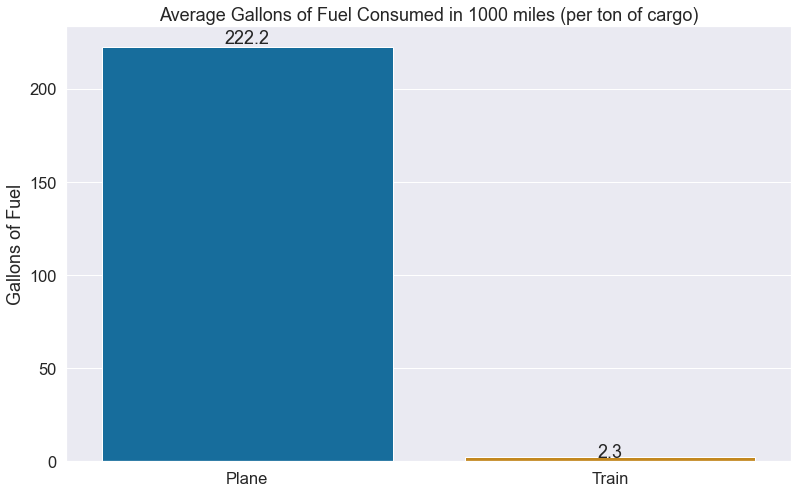

In [57]:
sns.set_palette("colorblind")

f = sns.barplot(data=Plane_Train_TonMPG_viz, x='Type', y='1000mi_gallons')
f.set(xlabel = '', ylabel = 'Gallons of Fuel')
f.set_title('Average Gallons of Fuel Consumed in 1000 Miles (per ton of cargo)')

show_values(f)

# Carbon Emissions 1000 miles work

Turns out it would be a lot easier to get my carbon emissions per 1000 miles data by moving my carbon data over here, rather than trying to move all these transport methods to that notebook

How many tons of carbon are produced when moving 1 ton cargo 1000 miles?

In [60]:
carbon = pd.read_csv('../data/co2_vol_massa_prepped.csv')
carbon

,Type of fuel:,Pounds CO2,lbs co2 unit of measure,Kilograms CO2,kilo co2 unit of measure,Pounds CO2 per million btu,Kilograms CO2 per million btu
0,Propane,12.61,gallon,5.72,gallon,138.63,62.88
1,Diesel and Home Heating Fuel (Distillate Fuel ...,22.46,gallon,10.19,gallon,163.45,74.14
2,Kerosene,21.78,gallon,9.88,gallon,161.35,73.19
3,Coal (All types),"4,027.93",short ton,"1,827.04",short ton,211.06,95.74
4,Natural Gas,121.31,thousand cubic feet,55.03,thousand cubic feet,116.65,52.91
5,Gasoline,18.74,gallon,8.5,gallon,155.77,70.66
6,Residual Heating Fuel (Businesses only),24.78,gallon,11.24,gallon,165.55,75.09
7,Jet Fuel,21.5,gallon,9.75,gallon,159.25,72.23
8,Aviation Gasoline,18.32,gallon,8.31,gallon,152.46,69.15
9,Petroleum coke,32.87,gallon,14.91,gallon,225.13,102.12


#Recleaning my data - per carbon emissions notebook

In [61]:
carbon = carbon[['Type of fuel: ','Pounds CO2 ','lbs co2 unit of measure']]

In [62]:
carbon = carbon[carbon['Type of fuel: '].isin(['Diesel and Home Heating Fuel (Distillate Fuel Oil)','Jet Fuel'])]

In [63]:
#adding my ship fuel data to my df

ship_added = {'Type of fuel: ':'Heavy Fuel Oil', 'Pounds CO2 ': 25.5, 'lbs co2 unit of measure': 'gallon'}
carbon = carbon.append(ship_added, ignore_index = True)

In [64]:
#renaming for visualizatoin clarity

carbon['Type of fuel: '] = carbon['Type of fuel: '].replace({'Diesel and Home Heating Fuel (Distillate Fuel Oil)': 'Diesel'})

In [65]:
carbon['Pounds CO2 '] = pd.to_numeric(carbon['Pounds CO2 '])

In [66]:
carbon

,Type of fuel:,Pounds CO2,lbs co2 unit of measure
0,Diesel,22.46,gallon
1,Jet Fuel,21.50,gallon
2,Heavy Fuel Oil,25.50,gallon


# 1000 MILES CO2 - SHIPS

In [72]:
#ship1000_result
ship1000_result['carbon1000']=ship1000_result['1000mi_fuel']*25.50

In [73]:
ship1000_result

,index,Ship Size (TEU),Speed-MPH,1000mi_fuel,carbon1000
0,2,4000-5000x,22.0,0.714989,18.232230
1,3,4000-5000x,26.0,1.133210,28.896857
2,4,5000-6000x,22.0,0.646088,16.475237
3,5,5000-6000x,26.0,1.021415,26.046083
4,6,7000-8000x,22.0,0.642125,16.374183
5,7,7000-8000x,26.0,1.004623,25.617898
6,8,8000-9000x,22.0,0.634577,16.181712
7,9,8000-9000x,26.0,0.995028,25.373205
8,10,9000-10000x,22.0,0.643977,16.421405
9,11,9000-10000x,26.0,0.996243,25.404207


Text(0.5, 1.0, 'Average Pounds of CO2 Released in 1000 Miles (per ton of cargo)')

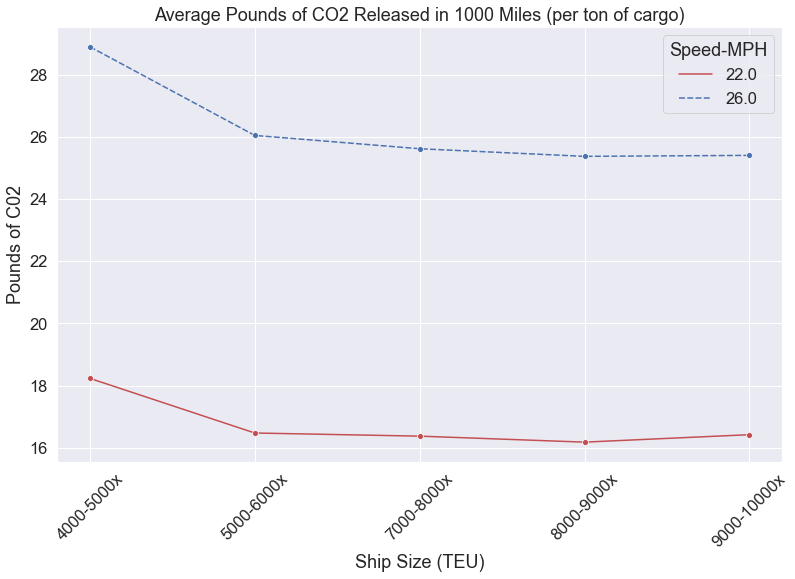

In [90]:
fig, ax = plt.subplots(figsize=(13,8))

g = sns.lineplot(data = ship1000_result, x = 'Ship Size (TEU)', y = 'carbon1000', hue = 'Speed-MPH',
                style = "Speed-MPH", marker="o", palette = ['r','b'])
plt.xticks(rotation=45)
g.set(xlabel = 'Ship Size (TEU)', ylabel = 'Pounds of C02')
g.set_title('Average Pounds of CO2 Released in 1000 Miles (per ton of cargo)')

# 1000 MILES CO2 - TRUCKS

In [75]:
truck_visual2

,Avg weight/tons,MPG,Ton_MPG,truck_types,1000mi
0,5,18.152113,90.760563,Light Duty - Short Wheelbase,11.018001
1,10,14.905556,149.055556,Light Duty - Long Wheelbase,6.708908
2,22,6.491549,142.814085,Heavy Duty,7.002110


In [76]:
truck_visual2['carbon1000'] = truck_visual2['1000mi'] *22.46

In [77]:
truck_visual2

,Avg weight/tons,MPG,Ton_MPG,truck_types,1000mi,carbon1000
0,5,18.152113,90.760563,Light Duty - Short Wheelbase,11.018001,247.464308
1,10,14.905556,149.055556,Light Duty - Long Wheelbase,6.708908,150.682072
2,22,6.491549,142.814085,Heavy Duty,7.002110,157.267402


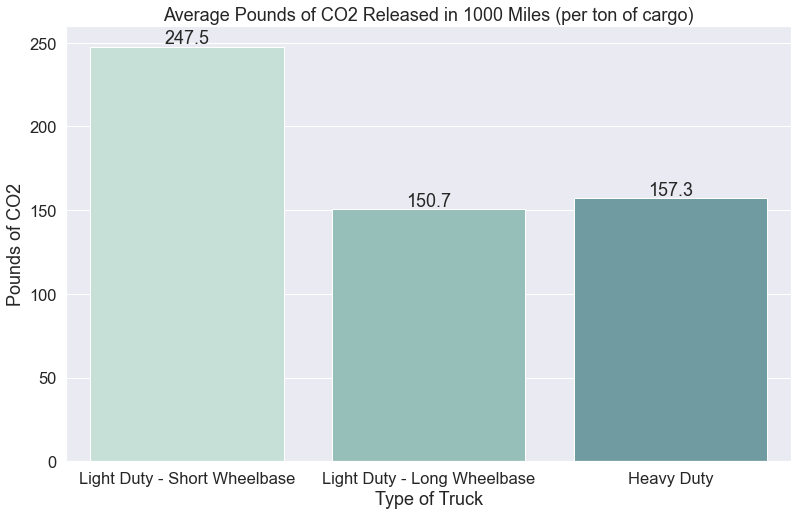

In [91]:
sns.set_palette("ch:start=0, rot=-.3")

h = sns.barplot(data=truck_visual2, x='truck_types', y='carbon1000')
h.set(xlabel = 'Type of Truck', ylabel = 'Pounds of CO2')
h.set_title('Average Pounds of CO2 Released in 1000 Miles (per ton of cargo)')

show_values(h)

# 1000 MILES CO2 - PLANE/TRAIN

In [79]:
Plane_Train_TonMPG_viz

,Type,Avg. Ton MPG,1000mi_gallons
0,Plane,4.5,222.222222
1,Train,436.0,2.293578


The plane emissions and the truck emissions are different.  makes sense to do them separately, then recombine them

In [80]:
train = Plane_Train_TonMPG_viz.loc[Plane_Train_TonMPG_viz['Type']=='Train']
train

,Type,Avg. Ton MPG,1000mi_gallons
1,Train,436.0,2.293578


In [81]:
train['carbon1000']= train['1000mi_gallons']*22.46
train

<ipython-input-81-9c80476185d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['carbon1000']= train['1000mi_gallons']*22.46


,Type,Avg. Ton MPG,1000mi_gallons,carbon1000
1,Train,436.0,2.293578,51.513761


In [82]:
plane = Plane_Train_TonMPG_viz.loc[Plane_Train_TonMPG_viz['Type']=='Plane']
plane

,Type,Avg. Ton MPG,1000mi_gallons
0,Plane,4.5,222.222222


In [83]:
plane['carbon1000']= plane['1000mi_gallons']*21.5

<ipython-input-83-d7709a9a624e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['carbon1000']= plane['1000mi_gallons']*21.5


In [84]:
dfs = [plane, train]

carbonplanetrain = pd.concat(dfs)

In [85]:
carbonplanetrain

,Type,Avg. Ton MPG,1000mi_gallons,carbon1000
0,Plane,4.5,222.222222,4777.777778
1,Train,436.0,2.293578,51.513761


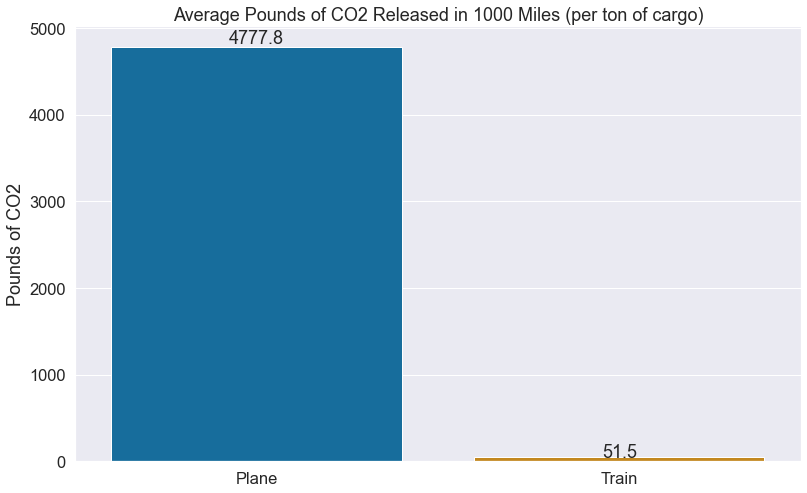

In [92]:
sns.set_palette("colorblind")

i = sns.barplot(data=carbonplanetrain, x='Type', y='carbon1000')
i.set(xlabel = '', ylabel = 'Pounds of CO2')
i.set_title('Average Pounds of CO2 Released in 1000 Miles (per ton of cargo)')

show_values(i)

# Fuel Prices per 1000 miles work

Like with the carbon emissions data, it may be easier to move the financial data to this notebook, where the fuel consumption data is already located and ready to use, rather than try to move all this data over to the financial notebook

In [94]:
price = pd.read_csv('../data/fuel_prices_prepped.csv', skiprows = 2)

In [95]:
#cleaning the df to match the cost notebook

price['Fuel type'] = price['Fuel type'].replace(' ','')

In [98]:
price_relevant = price[price['Fuel type'].isin([
    'On-highway Diesel Fuel ...................................................',
    'Jet Fuel ............................................................................',
    'No. 6 Residual Fuel Oil (a) ...............................................'])]

In [99]:
price_relevant['Fuel type'] = price_relevant['Fuel type'].replace({
    'On-highway Diesel Fuel ...................................................': 'Diesel',
    'Jet Fuel ............................................................................':'Jet Fuel',
    'No. 6 Residual Fuel Oil (a) ...............................................':'Heavy Fuel Oil'})

<ipython-input-99-720b2b69c8ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_relevant['Fuel type'] = price_relevant['Fuel type'].replace({


In [100]:
#dropping first column so i can do math on all remaining columns
price_relevant= price_relevant.drop('Fuel type', 1)

In [101]:
#converting all columns to dollar amounts - x.01 = price per gallon
price_relevant = price_relevant.mul([.01,.01,.01], axis=0)

In [102]:
#returning first column to df
price_relevant.insert(0,'Fuel type',['Jet Fuel','Heavy Fuel Oil', 'Diesel'], True)

In [103]:
price_viz2 = price_relevant[['Fuel type','20YEAR','21YEAR','22YEAR']]

In [104]:
price_viz2 = price_viz2.rename(columns = {'20YEAR':'2020', '21YEAR':'2021', '22YEAR':'2022'})
price_viz2.T
price_viz2=pd.melt(price_viz2, id_vars=['Fuel type'], value_vars=['2020', '2021', '2022'])

In [105]:
price_viz2

,Fuel type,variable,value
0,Jet Fuel,2020,1.31
1,Heavy Fuel Oil,2020,1.26
2,Diesel,2020,2.56
3,Jet Fuel,2021,1.97
4,Heavy Fuel Oil,2021,1.81
5,Diesel,2021,3.28
6,Jet Fuel,2022,2.08
7,Heavy Fuel Oil,2022,1.56
8,Diesel,2022,3.19


# FUEL COST FOR 1TON/1000 MILES - SHIPS

In [106]:
ship1000_result

,index,Ship Size (TEU),Speed-MPH,1000mi_fuel,carbon1000
0,2,4000-5000x,22.0,0.714989,18.232230
1,3,4000-5000x,26.0,1.133210,28.896857
2,4,5000-6000x,22.0,0.646088,16.475237
3,5,5000-6000x,26.0,1.021415,26.046083
4,6,7000-8000x,22.0,0.642125,16.374183
5,7,7000-8000x,26.0,1.004623,25.617898
6,8,8000-9000x,22.0,0.634577,16.181712
7,9,8000-9000x,26.0,0.995028,25.373205
8,10,9000-10000x,22.0,0.643977,16.421405
9,11,9000-10000x,26.0,0.996243,25.404207


In [107]:
ship1000_result['2020']= ship1000_result['1000mi_fuel'] * 1.26
ship1000_result['2021']= ship1000_result['1000mi_fuel'] * 1.81
ship1000_result['2022']= ship1000_result['1000mi_fuel'] * 1.56

In [108]:
shipcostfast = ship1000_result.loc[ship1000_result['Speed-MPH']==26.0]

In [109]:
shipcostslow = ship1000_result.loc[ship1000_result['Speed-MPH']==22.0]

In [110]:
shipcostfast = shipcostfast[['Ship Size (TEU)', '2020', '2021', '2022']]
shipcostfast

,Ship Size (TEU),2020,2021,2022
1,4000-5000x,1.427845,2.051110,1.767808
3,5000-6000x,1.286983,1.848761,1.593407
5,7000-8000x,1.265826,1.818368,1.567213
7,8000-9000x,1.253735,1.801000,1.552243
9,9000-10000x,1.255267,1.803201,1.554140


In [111]:
shipcostslow = shipcostslow[['Ship Size (TEU)', '2020', '2021', '2022']]
shipcostslow

,Ship Size (TEU),2020,2021,2022
0,4000-5000x,0.900887,1.294131,1.115383
2,5000-6000x,0.814071,1.169419,1.007897
4,7000-8000x,0.809077,1.162246,1.001715
6,8000-9000x,0.799567,1.148584,0.989940
8,9000-10000x,0.811411,1.165598,1.004604


In [112]:
shipcostfast.T

,1,3,5,7,9
Ship Size (TEU),4000-5000x,5000-6000x,7000-8000x,8000-9000x,9000-10000x
2020,1.427845,1.286983,1.265826,1.253735,1.255267
2021,2.05111,1.848761,1.818368,1.801,1.803201
2022,1.767808,1.593407,1.567213,1.552243,1.55414


In [113]:
shipcostslow.T

,0,2,4,6,8
Ship Size (TEU),4000-5000x,5000-6000x,7000-8000x,8000-9000x,9000-10000x
2020,0.900887,0.814071,0.809077,0.799567,0.811411
2021,1.294131,1.169419,1.162246,1.148584,1.165598
2022,1.115383,1.007897,1.001715,0.98994,1.004604


In [114]:
shipcostfast = pd.melt(shipcostfast, id_vars = ['Ship Size (TEU)'], value_vars=['2020', '2021', '2022'])
shipcostfast

,Ship Size (TEU),variable,value
0,4000-5000x,2020,1.427845
1,5000-6000x,2020,1.286983
2,7000-8000x,2020,1.265826
3,8000-9000x,2020,1.253735
4,9000-10000x,2020,1.255267
5,4000-5000x,2021,2.051110
6,5000-6000x,2021,1.848761
7,7000-8000x,2021,1.818368
8,8000-9000x,2021,1.801000
9,9000-10000x,2021,1.803201


In [115]:
shipcostslow = pd.melt(shipcostslow, id_vars = ['Ship Size (TEU)'], value_vars=['2020', '2021', '2022'])
shipcostslow

,Ship Size (TEU),variable,value
0,4000-5000x,2020,0.900887
1,5000-6000x,2020,0.814071
2,7000-8000x,2020,0.809077
3,8000-9000x,2020,0.799567
4,9000-10000x,2020,0.811411
5,4000-5000x,2021,1.294131
6,5000-6000x,2021,1.169419
7,7000-8000x,2021,1.162246
8,8000-9000x,2021,1.148584
9,9000-10000x,2021,1.165598


Text(0.5, 1.0, 'How Much Is Spent on Fuel (on average) To Move Cargo 1000 Miles (per ton of cargo)?')

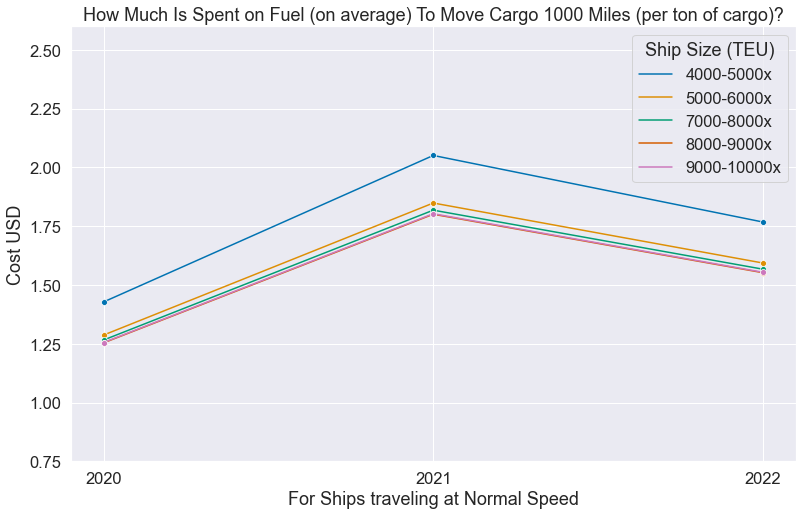

In [157]:
j = sns.lineplot(data = shipcostfast, x = 'variable', y = 'value', hue = 'Ship Size (TEU)', marker="o", palette = "colorblind")
j.set(ylim = (0.75,2.6))
j.set(xlabel = 'For Ships traveling at Normal Speed', ylabel = 'Cost USD')
j.set_title('How Much Is Spent on Fuel (on average) To Move Cargo 1000 Miles (per ton of cargo)?')

Text(0.5, 1.0, 'How Much Is Spent on Fuel (on average) To Move Cargo 1000 Miles (per ton of cargo)?')

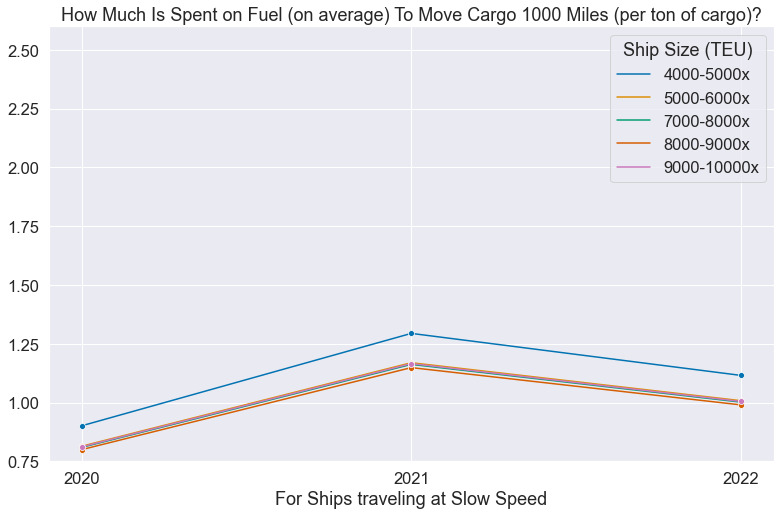

In [158]:
k = sns.lineplot(data = shipcostslow, x = 'variable', y = 'value', hue = 'Ship Size (TEU)', marker="o", palette = "colorblind")
k.set(ylim = (0.75,2.6))
k.set(xlabel = 'For Ships traveling at Slow Speed', ylabel = '')
k.set_title('How Much Is Spent on Fuel (on average) To Move Cargo 1000 Miles (per ton of cargo)?')

# FUEL COST FOR 1 TON/1000 MILES - TRUCK

In [138]:
truck_visual2

,Avg weight/tons,MPG,Ton_MPG,truck_types,1000mi,carbon1000
0,5,18.152113,90.760563,Light Duty - Short Wheelbase,11.018001,247.464308
1,10,14.905556,149.055556,Light Duty - Long Wheelbase,6.708908,150.682072
2,22,6.491549,142.814085,Heavy Duty,7.002110,157.267402


In [139]:
#price_viz2
truck_visual2['2020']= truck_visual2['1000mi'] * 2.56
truck_visual2['2021']= truck_visual2['1000mi'] * 3.28
truck_visual2['2022']= truck_visual2['1000mi'] * 3.19
truck_visual2

,Avg weight/tons,MPG,Ton_MPG,truck_types,1000mi,carbon1000,2020,2021,2022
0,5,18.152113,90.760563,Light Duty - Short Wheelbase,11.018001,247.464308,28.206083,36.139044,35.147424
1,10,14.905556,149.055556,Light Duty - Long Wheelbase,6.708908,150.682072,17.174804,22.005218,21.401416
2,22,6.491549,142.814085,Heavy Duty,7.002110,157.267402,17.925403,22.966922,22.336732


In [140]:
truck_visual3 = truck_visual2[['truck_types','2020','2021','2022']]
truck_visual3.T
truck_visual3 = pd.melt(truck_visual3, id_vars = ['truck_types'], value_vars=['2020', '2021', '2022'])
truck_visual3

,truck_types,variable,value
0,Light Duty - Short Wheelbase,2020,28.206083
1,Light Duty - Long Wheelbase,2020,17.174804
2,Heavy Duty,2020,17.925403
3,Light Duty - Short Wheelbase,2021,36.139044
4,Light Duty - Long Wheelbase,2021,22.005218
5,Heavy Duty,2021,22.966922
6,Light Duty - Short Wheelbase,2022,35.147424
7,Light Duty - Long Wheelbase,2022,21.401416
8,Heavy Duty,2022,22.336732


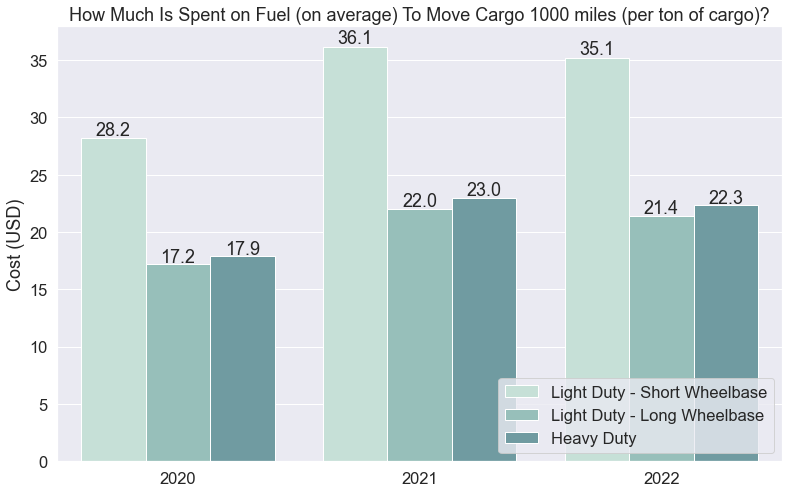

In [156]:
sns.set_palette("ch:start=0, rot=-.3")

l = sns.barplot(data=truck_visual3, x='variable', y='value', hue='truck_types')
l.set(xlabel = '', ylabel = 'Cost (USD)')
l.set_title('How Much Is Spent on Fuel (on average) To Move Cargo 1000 miles (per ton of cargo)?')
plt.legend(loc="lower right")

show_values(l)

# FUEL COST FOR 1 TON/1000 MILES - PLANE/TRAIN

In [143]:
train

,Type,Avg. Ton MPG,1000mi_gallons,carbon1000
1,Train,436.0,2.293578,51.513761


'''# i need to know the average tons of cargo per train to know how many gallons per ton are used every 1000 miles
#source: https://www.csx.com/index.cfm/about-us/the-csx-advantage/fuel-efficiency/
#avg load = 3000 tons

train['avg_tons'] = 3000
train['avg_tons'] = train['avg_tons'].astype(float)
train['tons_per_gallon'] = train['1000mi'] / train['avg_tons']  #initial error - need to convert int to float
#train.info()
train'''

#initially considered looking at cost per load, vs. per ton.  changed mind
#don't want to lose data, so keeping the cell

In [146]:
#price_viz2
train['2020']= train['1000mi_gallons'] * 2.56
train['2021']= train['1000mi_gallons'] * 3.28
train['2022']= train['1000mi_gallons'] * 3.19
train

<ipython-input-146-3e2a667e229a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['2020']= train['1000mi_gallons'] * 2.56
<ipython-input-146-3e2a667e229a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['2021']= train['1000mi_gallons'] * 3.28
<ipython-input-146-3e2a667e229a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,Type,Avg. Ton MPG,1000mi_gallons,carbon1000,2020,2021,2022
1,Train,436.0,2.293578,51.513761,5.87156,7.522936,7.316514


In [147]:
plane

,Type,Avg. Ton MPG,1000mi_gallons,carbon1000
0,Plane,4.5,222.222222,4777.777778


'''# i need to know the average tons of cargo per plane to know how many gallons per ton are used every 1000 miles
#source: National Air and Space Museum - https://howthingsfly.si.edu/ask-an-explainer/how-much-weight-can-average-size-airplane-hold
#so, 45000 lbs cargo/avg / 2000lbs per ton = 22.5

plane['avg_tons'] = 22.5
plane['tons_per_gallon'] = plane['1000mi'] / plane['avg_tons']
plane'''

#again - initially thought of a different lens, but decided against it
#keeping cell to keep data

In [148]:
plane['2020']= plane['1000mi_gallons'] * 1.31
plane['2021']= plane['1000mi_gallons'] * 1.97
plane['2022']= plane['1000mi_gallons'] * 2.08
plane

<ipython-input-148-8351daeb138a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['2020']= plane['1000mi_gallons'] * 1.31
<ipython-input-148-8351daeb138a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['2021']= plane['1000mi_gallons'] * 1.97
<ipython-input-148-8351daeb138a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,Type,Avg. Ton MPG,1000mi_gallons,carbon1000,2020,2021,2022
0,Plane,4.5,222.222222,4777.777778,291.111111,437.777778,462.222222


In [149]:
dfs = [plane, train]
planetrainfuelcost = pd.concat(dfs)
planetrainfuelcost

,Type,Avg. Ton MPG,1000mi_gallons,carbon1000,2020,2021,2022
0,Plane,4.5,222.222222,4777.777778,291.111111,437.777778,462.222222
1,Train,436.0,2.293578,51.513761,5.871560,7.522936,7.316514


In [151]:
planetraincost = planetrainfuelcost[['Type', '2020','2021','2022']]
planetraincost.T
planetraincost = pd.melt(planetraincost, id_vars = ['Type'], value_vars=['2020', '2021', '2022'])
planetraincost

,Type,variable,value
0,Plane,2020,291.111111
1,Train,2020,5.871560
2,Plane,2021,437.777778
3,Train,2021,7.522936
4,Plane,2022,462.222222
5,Train,2022,7.316514


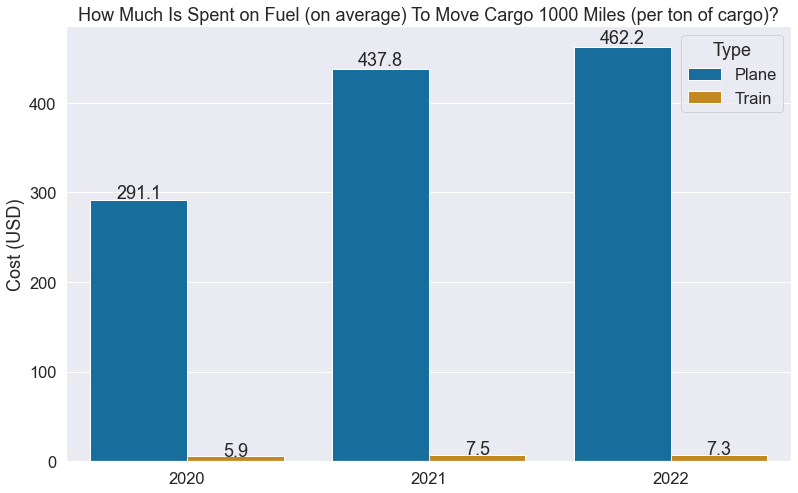

In [159]:
sns.set_palette("colorblind")

m = sns.barplot(data=planetraincost, x='variable', y='value', hue='Type')
m.set(xlabel = '', ylabel = 'Cost (USD)')
m.set_title('How Much Is Spent on Fuel (on average) To Move Cargo 1000 Miles (per ton of cargo)?')

show_values(m)